In [105]:
import os, sys
import shutil
import time
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objs as go

import scipy.integrate

# include the folder
sys.path.append(os.path.join(os.getcwd(), os.path.pardir))

import ns2dspectral

%load_ext autoreload
%autoreload 2



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [107]:
def save_image(data, fn, cm="rainbow"):
    vmax = np.max(np.abs(data))
    sizes = np.shape(data)
    height = float(sizes[0]); width = float(sizes[1])
    fig = plt.figure()
    fig.set_size_inches(width/height, 1, forward=False)
    ax = plt.Axes(fig, [0., 0., 1., 1.])
    ax.set_axis_off()
    fig.add_axes(ax)
#    ax.contourf(data, cmap=cm, vmin=-vmax, vmax=vmax, levels=80)
#    ax.contourf(data, cmap=cm, levels=40)
    plt.imshow(data, cmap=cm, vmin=-vmax, vmax=vmax, interpolation='gaussian')
#    plt.pcolormesh(data, cmap=cm, shading='gouraud')
    plt.savefig(fn, dpi = 4*height, bbox_inches="tight", pad_inches=0) 
    plt.close()

pi2 = np.pi * 2.0

In [108]:
def clean_folder(folder):
    if os.path.exists(folder):
        shutil.rmtree(folder)
    time.sleep(0.5)
    os.makedirs(folder, exist_ok=True)

In [127]:
Mx = 1024
My = 256
ns2d = ns2dspectral.NS2dSpectral(pi2, pi2, Mx, My, 1/10000, 1, .01, FFTW_threads=6)
np.max(ns2d.kw_factor[2])

1.3211835980188338

In [128]:
output_folder = os.path.join(os.getcwd(), os.path.pardir, 'output')
fig_folder = os.path.join(os.getcwd(), os.path.pardir, 'fig')
clean_folder(output_folder)
clean_folder(fig_folder)

mtx_vor = np.zeros((My, Mx))

mtx_vor[My//4] = pi2*1 + np.sin(3*ns2d.v_x) * 0.5
mtx_vor[3*My//4] = -(pi2*1 + np.cos(3*ns2d.v_x) * 0.5)
mtx_vor_k = ns2d.fft2d(mtx_vor)

amp = 0.25
freq = 3
mtx_u = np.ones((My, Mx))
mtx_v = amp * np.cos(freq * ns2d.mtx_x)
mtx_U = np.ones((My,Mx))
mtx_U = np.sqrt(mtx_u**2 + mtx_v**2)
mtx_v /= mtx_U
mtx_u /= mtx_U

width = pi2/200
gap = pi2/4 * (1 + 0.01 * np.random.standard_normal((My,Mx)))
mtx_r = np.abs(ns2d.mtx_y - np.pi)
mtx_m = 1 - 0.5*(np.tanh((mtx_r-gap)/width)+1)
mtx_v *= mtx_m
mtx_u *= mtx_m
# mask = (ns2d.mtx_y < 3*pi2/4 + amp * np.sin(freq*ns2d.mtx_x)) \
#      & (ns2d.mtx_y >= 1*pi2/4 + amp * np.sin(freq*ns2d.mtx_x))
# mtx_v[mask] = amp * np.cos(freq*ns2d.mtx_x[mask])
# mtx_u[mask] = 1.0


mtx_vor = ns2d.get_vor_from_uv(mtx_u, mtx_v)

mtx_vor_k = ns2d.fft2d(mtx_vor)

T = 1000
for n in range(T):
    if n % 20 == 0:
        print('CFL', ns2d.get_cfl_number(mtx_vor_k))
        mtx_vor = ns2d.ifft2d(mtx_vor_k)
        #save_image(mtx_vor, os.path.join(fig_folder, str(T + n)))
        mtx_vor_m = np.max(np.abs(mtx_vor))
        save_image(np.sign(mtx_vor) * (np.abs(mtx_vor)+0.0*mtx_vor_m), os.path.join(fig_folder, str(T + n)))
        
    mtx_vor_k = ns2d.march_forward_k(mtx_vor_k)


NameError: name 'xxx' is not defined

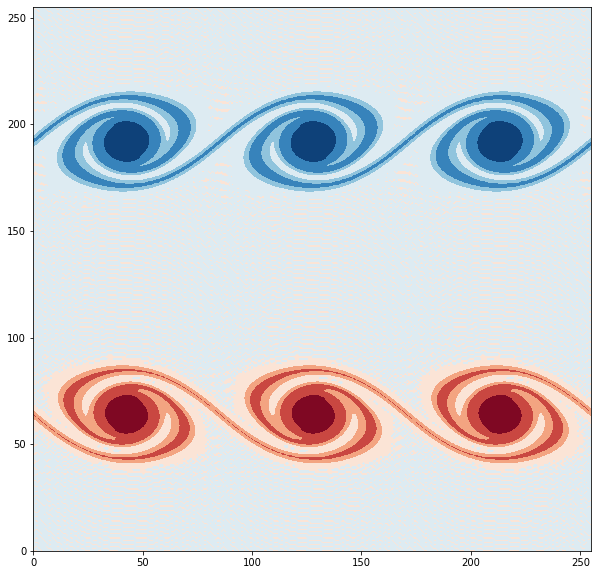

In [102]:
data = np.power(np.abs(mtx_vor), 1/3) * np.sign(mtx_vor)
#data = mtx_vor
vmax = 1.0 * np.max(np.abs(data))
sizes = np.shape(data)
height = float(sizes[0]); width = float(sizes[1])
fig = plt.figure(figsize=(10,10))
#fig.set_size_inches(width/height, 1, forward=False)
#ax = plt.Axes(fig, [0., 0., 1., 1.])
#ax.set_axis_off()
#fig.add_axes(ax)
#    ax.contourf(data, cmap=cm, vmin=-vmax, vmax=vmax, levels=80)
#    ax.contourf(data, cmap=cm, levels=40)
#plt.imshow(data, cmap='jet',vmin=-vmax, vmax=vmax, interpolation='gaussian')
plt.contourf(data, cmap='RdBu', vmin=-vmax, vmax=vmax)
#plt.pcolormesh(data, cmap='RdBu', vmin=-vmax, vmax=vmax)
#plt.pcolormesh(data, cmap=cm, shading='gouraud')
#plt.savefig(fn, dpi = 4*height, bbox_inches="tight", pad_inches=0) 
#plt.close()
